# Visualize gene expression

This notebook visualizes the gene expression data for the template and simulated experiments in order to:
1. Validate that the structure of the gene expression data and simulated data are consistent
2. To visualize the signal that is in the experiments

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

In [2]:
import os
import pandas as pd
import umap
import pickle
import glob
import seaborn as sns
from sklearn.decomposition import PCA
from keras.models import load_model
import plotnine as pn

from ponyo import utils
from generic_expression_patterns_modules import plot

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


## Load config parameters

In [3]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_pseudomonas_33245.tsv")
)

params = utils.read_config(config_filename)

In [4]:
# Load config params

local_dir = params['local_dir']
project_id = params['project_id']
num_simulated = params['num_simulated']

pval_name = "adj.P.Val"
logFC_name = "logFC"
run=0

# Settings for running visualization using pseudomonas config file
vae_model_dir = os.path.join(base_dir,"pseudomonas_analysis", "models", "NN_2500_30")
template_filename = params['processed_template_filename']
normalized_compendium_filename = params['normalized_compendium_filename']
scaler_filename = params['scaler_filename']

## Volcano plots

In [5]:
# Check number of DEGs
template_DE_stats_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_template_data_{project_id}_real.txt"
)

template_DE_stats = pd.read_csv(
    template_DE_stats_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

selected = template_DE_stats[(template_DE_stats[pval_name]<0.01) & (abs(template_DE_stats[logFC_name])>1)]
print(selected.shape)

(109, 6)


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


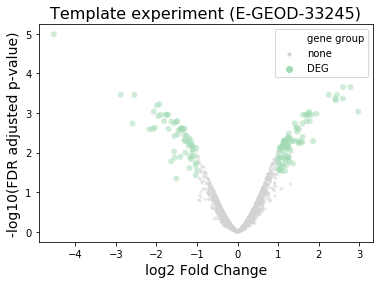

In [9]:
plot.make_volcano_template_highlight_DEG(
    template_DE_stats_filename,
    project_id,
    pval_name,
    logFC_name,
    os.path.join(local_dir,f"Pa_template_{project_id}.svg"
)

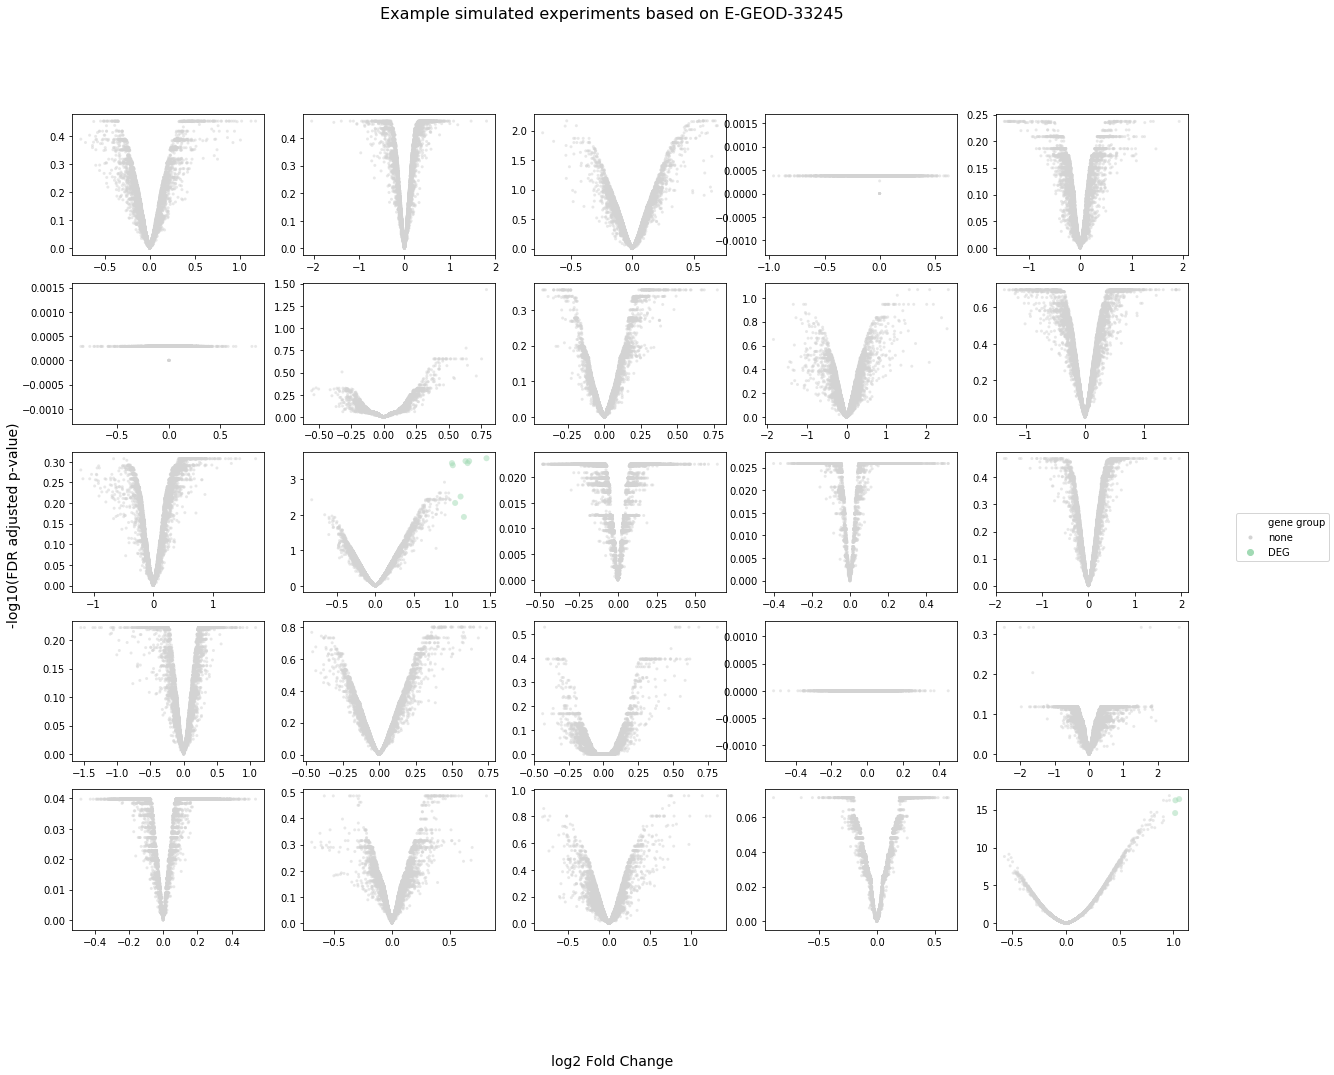

In [10]:
simulated_DE_stats_dir = os.path.join(local_dir, "DE_stats")

plot.make_volcano_simulated_highlight_DEG(
    simulated_DE_stats_dir,
    project_id,
    pval_name,
    logFC_name,
    num_simulated,
    5,
    5,
    20,
    15,
    os.path.join(local_dir,f"Pa_simulated_{project_id}.svg"
)

## Explore flat volcano plots

Why are some volcano plots flat?

In [8]:
# Lets look at the expression data for the volcano plot with DEGs
simulated_expression_filename = os.path.join(
    local_dir,
    "pseudo_experiment",
    f"selected_simulated_data_{project_id}_11.txt"
)

simulated_expression = pd.read_csv(
    simulated_expression_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

simulated_expression

PA0001  PA0002  PA0003  PA0004  PA0005  PA0006  \
GSM822708_wtLB_A.CEL           8.054   9.578   8.094   8.513   6.998   7.385   
GSM822709_wtLB_B.CEL           8.204   9.717   8.216   8.870   7.230   7.657   
GSM822712_delta_cbrBLB_A.CEL   8.418   9.866   8.263   8.713   7.165   7.476   
GSM822713_delta_cbrBLB_B.CEL   8.102   9.599   8.048   8.464   6.971   7.375   

                              PA0007  PA0008  PA0009  PA0010   ...    PA5561  \
GSM822708_wtLB_A.CEL           8.158   8.205   7.571   5.719   ...     7.176   
GSM822709_wtLB_B.CEL           8.160   8.136   7.648   5.709   ...     7.511   
GSM822712_delta_cbrBLB_A.CEL   8.312   8.258   7.730   5.680   ...     7.263   
GSM822713_delta_cbrBLB_B.CEL   8.298   8.139   7.470   5.681   ...     7.170   

                              PA5562  PA5563  PA5564  PA5565  PA5566  PA5567  \
GSM822708_wtLB_A.CEL           8.753   8.894   8.737   8.631   7.019   7.689   
GSM822709_wtLB_B.CEL           8.713   8.850   8.756   8.575   6.729   7.498   
GSM822712_delta_cbrBLB_A.CEL   8.822   9.182   8.878   8.827   6.215   7.488   
GSM822713_delta_cbrBLB_B.CEL   8.735   9.006   8.755   8.771   6.603   7.610   

                              PA5568  PA5569  PA5570  
GSM822708_wtLB_A.CEL           9.781  10.511   9.136  
GSM822709_wtLB_B.CEL           9.575  10.656   9.207  
GSM822712_delta_cbrBLB_A.CEL   9.528  10.651   9.604  
GSM822713_delta_cbrBLB_B.CEL   9.559  10.543   9.328  

[4 rows x 5549 columns]

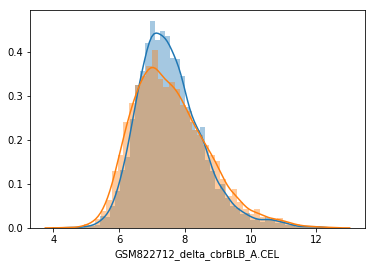

In [9]:
sns.distplot(simulated_expression.loc["GSM822708_wtLB_A.CEL"])
sns.distplot(simulated_expression.loc["GSM822712_delta_cbrBLB_A.CEL"])

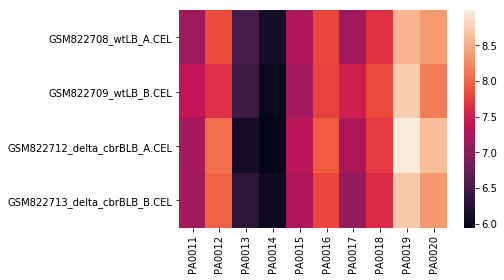

In [10]:
# Heatmap visualization
sns.heatmap(simulated_expression.iloc[:,10:20])

In [11]:
# Lets look at the expression data for the flat volcano plot
simulated_expression_filename = os.path.join(
    local_dir,
    "pseudo_experiment",
    f"selected_simulated_data_{project_id}_5.txt"
)

flat_simulated_expression = pd.read_csv(
    simulated_expression_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

flat_simulated_expression

PA0001  PA0002  PA0003  PA0004  PA0005  PA0006  \
GSM822708_wtLB_A.CEL           9.263  10.416   9.071   9.431   7.674   7.619   
GSM822709_wtLB_B.CEL           9.323  10.660   9.040   9.714   7.556   7.607   
GSM822712_delta_cbrBLB_A.CEL   9.380  10.605   9.199   9.528   7.903   7.687   
GSM822713_delta_cbrBLB_B.CEL   9.197  10.366   9.009   9.338   7.692   7.631   

                              PA0007  PA0008  PA0009  PA0010   ...    PA5561  \
GSM822708_wtLB_A.CEL           7.221   9.237   8.961   5.619   ...     7.495   
GSM822709_wtLB_B.CEL           7.164   9.164   9.033   5.624   ...     6.911   
GSM822712_delta_cbrBLB_A.CEL   7.087   9.263   9.084   5.578   ...     7.588   
GSM822713_delta_cbrBLB_B.CEL   7.257   9.140   8.831   5.604   ...     7.649   

                              PA5562  PA5563  PA5564  PA5565  PA5566  PA5567  \
GSM822708_wtLB_A.CEL           9.388  10.088   9.884   9.512   6.094   8.034   
GSM822709_wtLB_B.CEL           9.329   9.725   9.933   9.547   5.735   7.982   
GSM822712_delta_cbrBLB_A.CEL   9.500  10.181  10.033   9.678   5.835   7.974   
GSM822713_delta_cbrBLB_B.CEL   9.364  10.044   9.819   9.481   6.081   7.921   

                              PA5568  PA5569  PA5570  
GSM822708_wtLB_A.CEL          10.867  11.852  10.868  
GSM822709_wtLB_B.CEL          10.829  11.803  10.929  
GSM822712_delta_cbrBLB_A.CEL  10.879  12.009  11.168  
GSM822713_delta_cbrBLB_B.CEL  10.725  11.797  10.908  

[4 rows x 5549 columns]

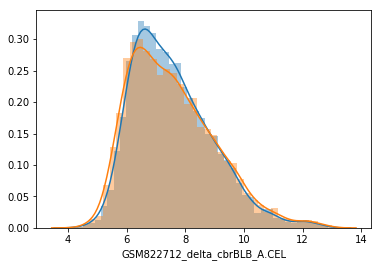

In [12]:
sns.distplot(flat_simulated_expression.loc["GSM822708_wtLB_A.CEL"])
sns.distplot(flat_simulated_expression.loc["GSM822712_delta_cbrBLB_A.CEL"])

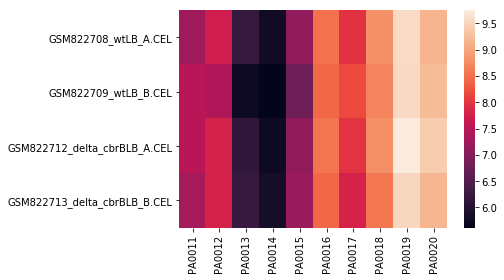

In [13]:
# Heatmap visualization
sns.heatmap(flat_simulated_expression.iloc[:,10:20])

In [14]:
# Lets look at the DE stats associated with this flat volcano plot
simulated_DE_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_simulated_data_{project_id}_5.txt"
)

flat_simulated_DE = pd.read_csv(
    simulated_DE_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

flat_simulated_DE

logFC   AveExpr             t   P.Value  adj.P.Val         B
PA3049  4.765000e-01   8.39725  3.201384e+00  0.010261   0.999338 -3.727213
PA3531  3.835000e-01   9.45975  2.942530e+00  0.015730   0.999338 -3.824578
PA4563  6.495000e-01  11.20125  2.898297e+00  0.016928   0.999338 -3.841847
PA3472  4.660000e-01   8.68750  2.857761e+00  0.018108   0.999338 -3.857830
PA3621  5.150000e-01   9.36350  2.852101e+00  0.018279   0.999338 -3.860074
PA3496  4.100000e-01   8.71350  2.802707e+00  0.019846   0.999338 -3.879772
PA5315  6.260000e-01   9.31700  2.761291e+00  0.021264   0.999338 -3.896452
PA3245  4.670000e-01   9.42450  2.730567e+00  0.022381   0.999338 -3.908920
PA2204 -3.900000e-01   8.05300 -2.674675e+00  0.024569   0.999338 -3.931801
PA2747  5.745000e-01   7.34725  2.668687e+00  0.024815   0.999338 -3.934268
PA3872 -5.930000e-01   7.95750 -2.632868e+00  0.026344   0.999338 -3.949080
PA2970  5.525000e-01  10.18075  2.632418e+00  0.026364   0.999338 -3.949267
PA0567  3.270000e-01   7.89300  2.632159e+00  0.026376   0.999338 -3.949374
PA1797 -5.725000e-01   6.82725 -2.625848e+00  0.026655   0.999338 -3.951995
PA3266  5.380000e-01   7.16200  2.624195e+00  0.026729   0.999338 -3.952682
PA2358 -4.635000e-01   7.05375 -2.604449e+00  0.027625   0.999338 -3.960903
PA5049  8.410000e-01   9.12300  2.575624e+00  0.028987   0.999338 -3.972957
PA3876 -4.495000e-01   6.73775 -2.535646e+00  0.030987   0.999338 -3.989775
PA4599 -3.270000e-01   6.93350 -2.533459e+00  0.031101   0.999338 -3.990698
PA5526  3.295000e-01   7.75025  2.530438e+00  0.031258   0.999338 -3.991974
PA1106  3.155000e-01   7.36375  2.525947e+00  0.031493   0.999338 -3.993872
PA0200 -6.550000e-01   8.29550 -2.524296e+00  0.031580   0.999338 -3.994570
PA2619  5.105000e-01   9.79575  2.488643e+00  0.033517   0.999338 -4.009691
PA5300  3.695000e-01   9.64475  2.475076e+00  0.034284   0.999338 -4.015467
PA1774  3.410000e-01   7.45950  2.473838e+00  0.034355   0.999338 -4.015994
PA2805  3.085000e-01   9.03075  2.461170e+00  0.035089   0.999338 -4.021399
PA3873 -4.565000e-01   7.21025 -2.454359e+00  0.035490   0.999338 -4.024310
PA1571  3.445000e-01   7.94375  2.428654e+00  0.037045   0.999338 -4.035320
PA2667  3.890000e-01   9.90250  2.424681e+00  0.037291   0.999338 -4.037025
PA0619 -3.275000e-01   8.61375 -2.417831e+00  0.037719   0.999338 -4.039968
...              ...       ...           ...       ...        ...       ...
PA0442 -5.000000e-04   4.28975 -4.249723e-03  0.996698   0.999338 -4.821502
PA0992  5.000000e-04   6.53925  4.228986e-03  0.996714   0.999338 -4.821502
PA5229 -5.000000e-04   7.58425 -4.197179e-03  0.996739   0.999338 -4.821502
PA2810 -5.000000e-04   6.64025 -4.174837e-03  0.996756   0.999338 -4.821502
PA4993  5.000000e-04   7.53975  4.149186e-03  0.996776   0.999338 -4.821502
PA2032  5.000000e-04   7.21925  4.138834e-03  0.996784   0.999338 -4.821502
PA5422 -5.000000e-04   8.05925 -4.117406e-03  0.996801   0.999338 -4.821502
PA3712 -5.000000e-04   8.86575 -4.026552e-03  0.996872   0.999338 -4.821502
PA4203 -5.000000e-04   6.31775 -3.929601e-03  0.996947   0.999338 -4.821502
PA1606  5.000000e-04   7.02975  3.892318e-03  0.996976   0.999338 -4.821502
PA4043 -5.000000e-04   9.03925 -3.882718e-03  0.996983   0.999338 -4.821502
PA3635 -5.000000e-04  10.11775 -3.799426e-03  0.997048   0.999338 -4.821503
PA4586 -5.000000e-04   6.35175 -3.789474e-03  0.997056   0.999338 -4.821503
PA0121 -5.000000e-04   7.09975 -3.775139e-03  0.997067   0.999338 -4.821503
PA5224  5.000000e-04   9.19175  3.733691e-03  0.997099   0.999338 -4.821503
PA0389 -5.000000e-04   8.19725 -3.652090e-03  0.997163   0.999338 -4.821503
PA2783  5.000000e-04   6.19425  3.479832e-03  0.997296   0.999338 -4.821503
PA2231 -5.000000e-04   7.09825 -3.459677e-03  0.997312   0.999338 -4.821503
PA4800 -5.000000e-04   6.73825 -3.402459e-03  0.997357   0.999338 -4.821503
PA4189  2.664535e-15   6.18500  1.929750e-14  1.000000   1.000000 -4.821506
PA1930 -1.776357e-15   6.14650 -1.392728e-14  1.000000   1.0000

In [15]:
# Lets look at the DE stats associated with DEGs volcano plot
simulated_DE_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_simulated_data_{project_id}_11.txt"
)

simulated_DE = pd.read_csv(
    simulated_DE_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

simulated_DE

logFC   AveExpr             t       P.Value  adj.P.Val  \
PA2746  1.452000e+00   7.71950  1.045692e+01  4.611411e-08   0.000256   
PA1177  1.225500e+00   7.51125  9.568993e+00  1.405486e-07   0.000308   
PA4306  1.178000e+00   8.91300  9.439745e+00  1.663766e-07   0.000308   
PA1728  1.001000e+00   8.99200  9.073154e+00  2.710305e-07   0.000351   
PA1190  1.206000e+00   9.29950  8.959906e+00  3.160449e-07   0.000351   
PA2486  1.012000e+00   8.16550  8.725558e+00  4.362973e-07   0.000404   
PA3451  9.035000e-01   7.30575  7.856716e+00  1.523921e-06   0.001208   
PA1930  8.530000e-01   8.09500  7.263642e+00  3.774184e-06   0.002425   
PA3986  8.335000e-01   8.13225  7.135462e+00  4.618900e-06   0.002425   
PA1465  9.195000e-01   7.51775  7.126021e+00  4.688531e-06   0.002425   
PA3923  8.445000e-01   8.44525  7.082936e+00  5.020595e-06   0.002425   
PA3922  9.585000e-01   9.53275  7.055551e+00  5.244448e-06   0.002425   
PA1176  1.113500e+00   7.73625  6.829223e+00  7.549841e-06   0.003059   
PA2618  8.080000e-01   8.05050  6.776428e+00  8.227729e-06   0.003059   
PA3049  9.280000e-01  10.95850  6.773323e+00  8.269549e-06   0.003059   
PA1041  9.555000e-01  10.01825  6.641492e+00  1.026756e-05   0.003396   
PA2366  8.455000e-01   8.85675  6.603987e+00  1.092431e-05   0.003396   
PA2365  8.465000e-01   8.56925  6.598875e+00  1.101719e-05   0.003396   
PA4702  7.705000e-01   7.80025  6.454280e+00  1.401869e-05   0.003637   
PA2306  7.160000e-01   7.66550  6.451027e+00  1.409535e-05   0.003637   
PA3418  8.800000e-01   9.35250  6.450337e+00  1.411166e-05   0.003637   
PA4607  9.190000e-01  10.91050  6.430908e+00  1.457935e-05   0.003637   
PA4913  6.950000e-01   7.79700  6.404278e+00  1.524692e-05   0.003637   
PA0179  7.130000e-01   9.54400  6.344611e+00  1.686174e-05   0.003637   
PA0105  9.210000e-01   8.53300  6.334286e+00  1.715891e-05   0.003637   
PA4573  6.800000e-01   8.73450  6.319248e+00  1.760157e-05   0.003637   
PA1761  8.870000e-01   9.08600  6.316120e+00  1.769517e-05   0.003637   
PA4377  8.330000e-01   8.56700  6.252180e+00  1.972659e-05   0.003762   
PA3235  7.005000e-01   8.76075  6.218417e+00  2.089651e-05   0.003762   
PA4296  9.740000e-01   9.56550  6.218196e+00  2.090439e-05   0.003762   
...              ...       ...           ...           ...        ...   
PA2274 -1.500000e-03   7.49125 -1.334892e-02  9.895349e-01   0.994734   
PA2740 -1.500000e-03   8.46575 -1.269115e-02  9.900505e-01   0.995072   
PA1330  1.500000e-03   7.68725  1.236163e-02  9.903088e-01   0.995151   
PA3983 -1.500000e-03   7.26875 -1.171030e-02  9.908194e-01   0.995484   
PA4650  1.000000e-03   6.41750  9.493932e-03  9.925569e-01   0.996210   
PA2389 -1.000000e-03   7.89500 -9.473990e-03  9.925726e-01   0.996210   
PA1542  1.000000e-03   5.90700  9.422399e-03  9.926130e-01   0.996210   
PA3631 -1.000000e-03   7.87100 -9.410658e-03  9.926222e-01   0.996210   
PA3364 -1.000000e-03   6.94750 -9.356257e-03  9.926649e-01   0.996210   
PA3618  1.000000e-03   8.80600  9.181086e-03  9.928022e-01   0.996210   
PA0746 -1.000000e-03   7.63100 -8.844961e-03  9.930657e-01   0.996210   
PA1054 -1.000000e-03   6.60450 -8.810499e-03  9.930927e-01   0.996210   
PA0316 -1.000000e-03   8.69450 -8.727209e-03  9.931580e-01   0.996210   
PA0806  1.000000e-03   7.29850  7.838137e-03  9.938550e-01   0.996729   
PA5022  5.000000e-04   7.52225  4.734046e-03  9.962886e-01   0.997873   
PA0305  5.000000e-04   8.04775  4.733031e-03  9.962893e-01   0.997873   
PA5050 -5.000000e-04   7.69525 -4.714121e-03  9.963042e-01   0.997873   
PA4200 -5.000000e-04   6.94325 -4.672919e-03  9.963365e-01   0.997873   
PA5209  5.000000e-04   7.21925  4.587343e-03  9.964036e-01   0.997873   
PA4242 -5.000000e-04  10.78375 -4.544961e-03  9.964368e-01   0.997873   
PA2196  5.000000e-04   6.90175  4.462879e-03  9.965011e-01   0.997873   
PA0003  5.000000e-04   8.15525  4.345139e-03  9.965934e-01   0.997873   
PA5559  5.000000e-04  10.52175  4.153216e-03  9.967439e-01   0.997873   


Flat volcano plots are due to samples between the two groups are very similar, so the log2 fold change is very small 10^-1 for each gene and so the adjusted p-values are nearly the same for each gene. Another artifact of the VAE variance shrinkage.

## Explore leveling out of volcano plots

Why do volcano plots level out at at then extend outward? Is this an issue with the plotting?

In [16]:
import matplotlib.pyplot as plt    
def make_volcano_plot_simulated_notransform(
    simulated_DE_stats_dir,
    project_id,
    pval_name,
    logFC_name,
    num_simulated,
    ncols,
    nrows,
    fig_width,
    fig_height,
):
    """
	This function makes multiple volcano plots of example simulated experiments

    Arguments
    ----------
    template_DE_stats_filename: str
        File containing DE statistics for template experiment
    project_id: str
        Experiment identifier
    pval_name: "padj" or "adj.P.Val"
    logFC_name: "logFC" or "log2FoldChange"
    num_simulated: int
        Number of simulated experiments
    ncols: int
        Number of columns in facet plot
    nrows: int
        Number of rows in facet plot
    fig_width: int
        Width of figure
    fig_height: ing
        Height of figure

	"""
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(fig_width, fig_height))

    axes = axes.ravel()

    for i in range(num_simulated):

        # Get filename
        simulated_DE_stats_filename = os.path.join(
            simulated_DE_stats_dir, f"DE_stats_simulated_data_{project_id}_{i}.txt",
        )

        # Read simulated DE stats
        simulated_DE_stats_df = pd.read_csv(
            simulated_DE_stats_filename, sep="\t", index_col=0, header=0
        )

        # Take negative of adjusted p-value
        simulated_DE_stats_df["padj_neg"] = -(simulated_DE_stats_df[pval_name])

        # Label DEGs by traditional criteria
        # log2FC > 1
        # padj < 0.05
        simulated_DE_stats_df["gene group"] = "none"
        simulated_DE_stats_df.loc[
            (abs(simulated_DE_stats_df[logFC_name]) > 1)
            & (simulated_DE_stats_df[pval_name] < 0.05),
            "gene group",
        ] = "DEG"

        # Plot
        colors = ["lightgrey", "#2c7fb8"]

        if i == 0:
            f = sns.scatterplot(
                data=simulated_DE_stats_df,
                x=logFC_name,
                y="padj_neg",
                hue="gene group",
                hue_order=["none", "DEG"],
                style="gene group",
                markers={"none": ".", "DEG": "o",},
                palette=colors,
                linewidth=0,
                alpha=0.5,
                legend="full",
                ax=axes[i],
            )

            axes[i].set_ylabel("")
            axes[i].set_xlabel("")
            handles, labels = f.get_legend_handles_labels()
            fig.legend(handles, labels, loc="center right")
            f.legend_.remove()

        else:
            f = sns.scatterplot(
                data=simulated_DE_stats_df,
                x=logFC_name,
                y="padj_neg",
                hue="gene group",
                hue_order=["none", "DEG"],
                style="gene group",
                markers={"none": ".", "DEG": "o",},
                palette=colors,
                linewidth=0,
                alpha=0.5,
                legend=False,
                ax=axes[i],
            )

            axes[i].set_ylabel("")
            axes[i].set_xlabel("")

    fig.text(0.5, 0.0, "log2 Fold Change", ha="center", fontsize=14, fontname="Verdana")
    fig.text(
        0.08,
        0.5,
        "-(FDR adjusted p-value)",
        va="center",
        rotation="vertical",
        fontsize=14,
        fontname="Verdana",
    )
    fig.suptitle(
        f"Example simulated experiments based on {project_id}",
        fontsize=16,
        fontname="Verdana",
    )

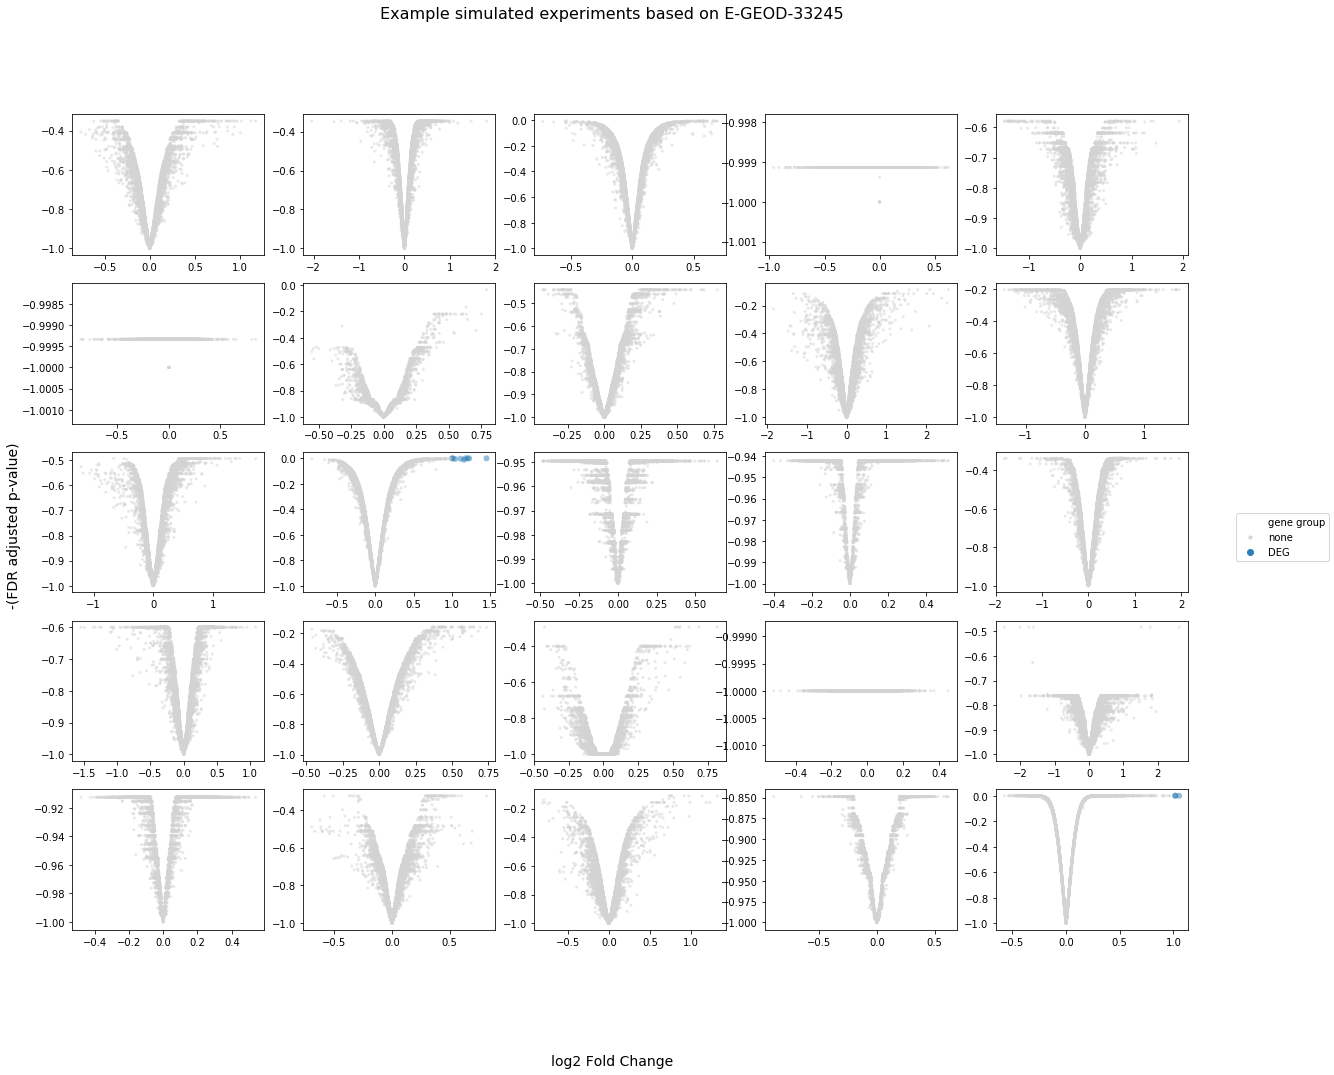

In [17]:
simulated_DE_stats_dir = os.path.join(local_dir, "DE_stats")

make_volcano_plot_simulated_notransform(
    simulated_DE_stats_dir,
    project_id,
    pval_name,
    logFC_name,
    num_simulated,
    5,
    5,
    20,
    15
)

There is still a leveling off but it doesn't look as dramatic if we don't take the log10 but just negate the adjusted p-values.

In [18]:
# Let's look at the distribution of adjusted p-value scores for those volcano
# plots that level off as increase logFC
simulated_DE_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_simulated_data_{project_id}_1.txt"
)

leveloff_simulated_DE = pd.read_csv(
    simulated_DE_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

In [19]:
# Compare the distribution of adjusted p-value scores
# for the volcano plot that doesn't level off as much
# as we increase logFC
simulated_DE_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_simulated_data_{project_id}_2.txt"
)

simulated_DE = pd.read_csv(
    simulated_DE_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

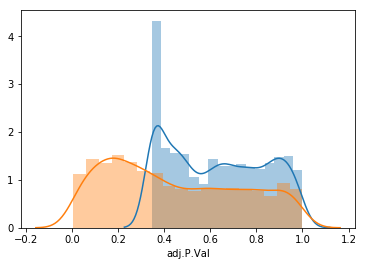

In [20]:
sns.distplot(leveloff_simulated_DE[pval_name])
sns.distplot(simulated_DE[pval_name])

         logFC   AveExpr         t   P.Value  adj.P.Val         B
PA4607  0.7085   9.87475  6.006813  0.000905   0.345318 -2.849789
PA1471  0.9955   6.56775  5.566528  0.001351   0.345318 -2.916420
PA5427  0.8245  10.08575  5.411886  0.001564   0.345318 -2.942539
PA1746  0.5400   9.94450  5.223844  0.001876   0.345318 -2.976428
PA0506  0.7700   8.40650  5.216944  0.001889   0.345318 -2.977718
PA3584  0.8690   9.12100  5.199698  0.001921   0.345318 -2.980958
PA1176  0.5845   6.66125  5.199171  0.001922   0.345318 -2.981057
PA1177  0.7130   6.13650  5.069636  0.002185   0.345318 -3.006093
PA2634  0.5545   8.85675  4.984747  0.002380   0.345318 -3.023189
PA2753  0.9535   7.86125  4.943301  0.002482   0.345318 -3.031741
PA4296  0.5210   8.12200  4.821178  0.002813   0.345318 -3.057754
PA3126  0.6840   8.11200  4.750817  0.003026   0.345318 -3.073311
PA2759  0.6355   5.58975  4.737338  0.003068   0.345318 -3.076340
PA3418  0.8550   7.77700  4.703710  0.003178   0.345318 -3.083967
PA4542  0.

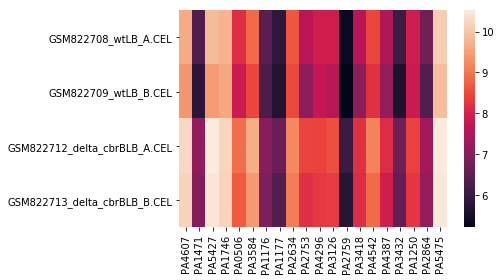

In [21]:
# Get genes in peak of distribution (blue)
gene_ids = list(leveloff_simulated_DE[leveloff_simulated_DE[pval_name]<0.4].index)
print(leveloff_simulated_DE[leveloff_simulated_DE[pval_name]<0.4].head(20))

leveloff_simulated_expression_filename = os.path.join(
    local_dir,
    "pseudo_experiment",
    f"selected_simulated_data_{project_id}_1.txt"
)

leveloff_simulated_expression = pd.read_csv(
    leveloff_simulated_expression_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)
sns.heatmap(leveloff_simulated_expression[gene_ids[0:20]])

         logFC   AveExpr          t   P.Value  adj.P.Val         B
PA1041  0.6120   8.99200  11.695902  0.000003   0.006821  5.063009
PA1175  0.6630   8.58050  11.687066  0.000003   0.006821  5.058229
PA3451  0.5975   6.51725  11.502069  0.000004   0.006821  4.957013
PA2746  0.6765   6.74425  10.780334  0.000006   0.006821  4.540663
PA1176  0.6550   7.27350  10.598417  0.000007   0.006821  4.430033
PA0108  0.5775   7.96225  10.346351  0.000008   0.006821  4.272741
PA0588  0.5755  10.50925  10.132831  0.000009   0.006821  4.135745
PA0105  0.5820   7.35300  10.007147  0.000010   0.006821  4.053446
PA1556 -0.5350   8.88900  -9.737397  0.000013   0.006821  3.872532
PA2433  0.5435   8.66025   9.616244  0.000014   0.006821  3.789328
PA1177  0.5785   6.99375   9.579869  0.000014   0.006821  3.764105
PA2375  0.5445   7.96075   9.517898  0.000015   0.006821  3.720875
PA5359  0.5310   8.15000   9.244525  0.000018   0.007018  3.526200
PA1173  0.5310   7.46150   9.202873  0.000019   0.007018  3.49

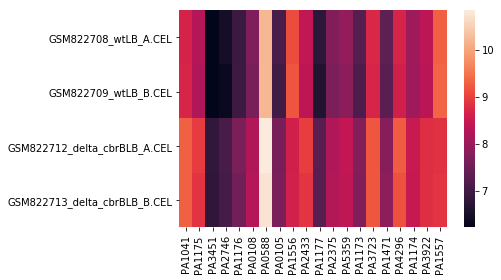

In [22]:
# Get genes in peak of distribution (orange)
gene_ids = list(simulated_DE[simulated_DE[pval_name]<0.4].index)
print(simulated_DE[simulated_DE[pval_name]<0.4].head(20))

simulated_expression_filename = os.path.join(
    local_dir,
    "pseudo_experiment",
    f"selected_simulated_data_{project_id}_2.txt"
)

simulated_expression = pd.read_csv(
    simulated_expression_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)
sns.heatmap(simulated_expression[gene_ids[0:20]])

In [23]:
# Let's look at the distribution of adjusted p-value scores for those volcano
# plots that is completely flat
simulated_DE_filename = os.path.join(
    local_dir,
    "DE_stats",
    f"DE_stats_simulated_data_{project_id}_3.txt"
)

flat_simulated_DE = pd.read_csv(
    simulated_DE_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


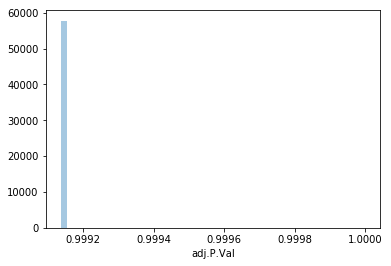

In [24]:
sns.distplot(flat_simulated_DE[pval_name])

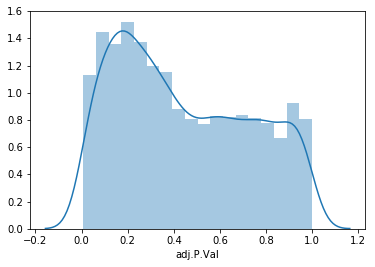

In [25]:
sns.distplot(simulated_DE[pval_name])

         logFC   AveExpr         t   P.Value  adj.P.Val         B
PA2306  0.4795   7.04325  4.801088  0.005003   0.999136 -3.707850
PA3875 -0.4580   6.42650 -4.373269  0.007360   0.999136 -3.755561
PA3872 -0.4490   7.92300 -4.297629  0.007900   0.999136 -3.765002
PA0628 -0.5335   7.81175 -4.006111  0.010461   0.999136 -3.804623
PA1150 -0.4830   7.21050 -3.876651  0.011898   0.999136 -3.824010
PA1985  0.6235   7.04725  3.873899  0.011931   0.999136 -3.824435
PA0623 -0.6710   8.83850 -3.807281  0.012761   0.999136 -3.834889
PA0291 -0.3805   9.89875 -3.791532  0.012967   0.999136 -3.837409
PA2485  0.5225   7.09325  3.777363  0.013155   0.999136 -3.839691
PA0630 -0.4215   6.88725 -3.758522  0.013411   0.999136 -3.842750
PA0049 -0.4615   7.18025 -3.742586  0.013631   0.999136 -3.845358
PA3873 -0.4125   7.00975 -3.724601  0.013885   0.999136 -3.848325
PA1661 -0.4935   7.15525 -3.719194  0.013962   0.999136 -3.849222
PA4141 -0.4645  10.00275 -3.709719  0.014099   0.999136 -3.850799
PA0636 -0.

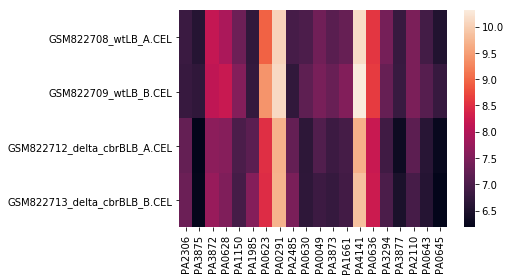

In [26]:
# Get genes in peak of distribution (flat)
gene_ids = list(flat_simulated_DE.index)
print(flat_simulated_DE.head(20))

flat_simulated_expression_filename = os.path.join(
    local_dir,
    "pseudo_experiment",
    f"selected_simulated_data_{project_id}_3.txt"
)

flat_simulated_expression = pd.read_csv(
    flat_simulated_expression_filename, 
    sep="\t", 
    header=0, 
    index_col=0
)
sns.heatmap(flat_simulated_expression[gene_ids[0:20]])

Looks like there is a peak of adjusted p-values at the minimum range of the distribution which is causing the leveling out (i.e. there are many genes with a similar low adjusted p-value). I am guessing this is also a result of the VAE shrinkage, where instead of genes having varying logFC, genes are compressed such that there are groups of genes with similar logFC and therefore similar adjusted p-values.

The first heatmap shows the expression in the simulated experiment with flat top (blue) for those genes with low adjusted p-values (i.e. in the peak of the distribution). The second heatmap shows the expression of the simulated experiment with a more V-shape (orange) for those genes with low adjusted p-values (i.e. those with adjusted p-values = 0-0.4). For the more V-shaped experiment, it looks there was more consistency amongst samples within the group (i.e. WT vs mutant). Depending on the simulation experiment generated, there might be some noise created by the VAE.

A similar trend is seen for the volcano plot that is completely flat as well. There is more noise in the gene expression data.

## Expression of template experiment

Do the samples have a clear separation in gene space (WT vs mutant)?

In [27]:
normalized_compendium_data = pd.read_csv(normalized_compendium_filename, sep="\t", index_col=0, header=0)
template_data = pd.read_csv(template_filename, sep="\t", index_col=0, header=0)

In [28]:
print(template_data.shape)
template_data

(4, 5549)


PA0001     PA0002    PA0003    PA0004  \
GSM822708_wtLB_A.CEL          8.725261  10.818665  8.648232  9.795110   
GSM822709_wtLB_B.CEL          8.709181  11.074085  8.628407  9.798127   
GSM822712_delta_cbrBLB_A.CEL  8.933442  10.825599  9.281394  9.653158   
GSM822713_delta_cbrBLB_B.CEL  8.816006  10.910335  8.988032  9.633217   

                                PA0005    PA0006    PA0007    PA0008  \
GSM822708_wtLB_A.CEL          7.222215  7.683016  7.513171  8.892119   
GSM822709_wtLB_B.CEL          7.116004  7.861031  7.188534  8.719834   
GSM822712_delta_cbrBLB_A.CEL  7.641374  7.494815  7.459183  8.956540   
GSM822713_delta_cbrBLB_B.CEL  7.636063  7.523389  7.802859  8.932256   

                                PA0009    PA0010    ...        PA5561  \
GSM822708_wtLB_A.CEL          8.388757  5.608060    ...      6.992342   
GSM822709_wtLB_B.CEL          8.736998  5.640265    ...      6.972987   
GSM822712_delta_cbrBLB_A.CEL  8.680455  5.316863    ...      7.344192   
GSM822713_delta_cbrBLB_B.CEL  8.744774  5.425286    ...      7.048683   

                                PA5562    PA5563    PA5564    PA5565  \
GSM822708_wtLB_A.CEL          8.782714  8.934537  8.845352  8.419585   
GSM822709_wtLB_B.CEL          8.880219  9.060605  8.899680  8.420385   
GSM822712_delta_cbrBLB_A.CEL  8.942372  9.156114  9.347092  8.929268   
GSM822713_delta_cbrBLB_B.CEL  8.910389  8.901842  9.186209  8.643274   

                                PA5566    PA5567     PA5568     PA5569  \
GSM822708_wtLB_A.CEL          7.182007  7.621927   9.723923  11.453448   
GSM822709_wtLB_B.CEL          6.203807  7.273466   9.980988  11.270670   
GSM822712_delta_cbrBLB_A.CEL  6.213582  7.406932  10.002538  11.467220   
GSM822713_delta_cbrBLB_B.CEL  6.642638  7.687928  10.043789  11.552872   

                                 PA5570  
GSM822708_wtLB_A.CEL           9.939358  
GSM822709_wtLB_B.CEL          10.005914  
GSM822712_delta_cbrBLB_A.CEL  10.094007  
GSM822713_delta_cbrBLB_B.CEL   9.933495  

[4 rows x 5549 columns]

In [29]:
# If template experiment included in training compendium
# Get normalized template data
sample_ids = list(template_data.index)
normalized_template_data = normalized_compendium_data.loc[sample_ids]

print(normalized_template_data.shape)
normalized_template_data.head()

(4, 5549)


PA0001  PA0002  PA0003  PA0004  PA0005  PA0006  \
GSM822708_wtLB_A.CEL           0.625   0.775   0.508   0.793   0.395   0.467   
GSM822709_wtLB_B.CEL           0.621   0.828   0.504   0.794   0.370   0.521   
GSM822712_delta_cbrBLB_A.CEL   0.678   0.777   0.638   0.759   0.492   0.409   
GSM822713_delta_cbrBLB_B.CEL   0.648   0.794   0.578   0.754   0.491   0.418   

                              PA0007  PA0008  PA0009  PA0010   ...    PA5561  \
GSM822708_wtLB_A.CEL           0.275   0.597   0.579   0.205   ...     0.327   
GSM822709_wtLB_B.CEL           0.195   0.559   0.656   0.213   ...     0.323   
GSM822712_delta_cbrBLB_A.CEL   0.261   0.612   0.643   0.137   ...     0.393   
GSM822713_delta_cbrBLB_B.CEL   0.345   0.606   0.657   0.163   ...     0.337   

                              PA5562  PA5563  PA5564  PA5565  PA5566  PA5567  \
GSM822708_wtLB_A.CEL           0.517   0.502   0.508   0.453   0.475   0.542   
GSM822709_wtLB_B.CEL           0.536   0.525   0.519   0.453   0.260   0.449   
GSM822712_delta_cbrBLB_A.CEL   0.548   0.543   0.615   0.582   0.262   0.485   
GSM822713_delta_cbrBLB_B.CEL   0.542   0.496   0.581   0.510   0.357   0.560   

                              PA5568  PA5569  PA5570  
GSM822708_wtLB_A.CEL           0.522   0.727   0.620  
GSM822709_wtLB_B.CEL           0.574   0.697   0.630  
GSM822712_delta_cbrBLB_A.CEL   0.579   0.729   0.642  
GSM822713_delta_cbrBLB_B.CEL   0.587   0.743   0.620  

[4 rows x 5549 columns]

In [30]:
# Label samples 
wt_sample_ids = ["GSM822708_wtLB_A.CEL", "GSM822709_wtLB_B.CEL"]
mutant_sample_ids = ["GSM822712_delta_cbrBLB_A.CEL", "GSM822713_delta_cbrBLB_B.CEL"]
normalized_compendium_data['sample group'] = "compendium"
normalized_template_data.loc[wt_sample_ids, 'sample group'] = "template_WT"
normalized_template_data.loc[mutant_sample_ids, 'sample group'] = "template_mutant"

In [31]:
normalized_all_data = pd.concat([normalized_template_data,
                                 normalized_compendium_data
])

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 885 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


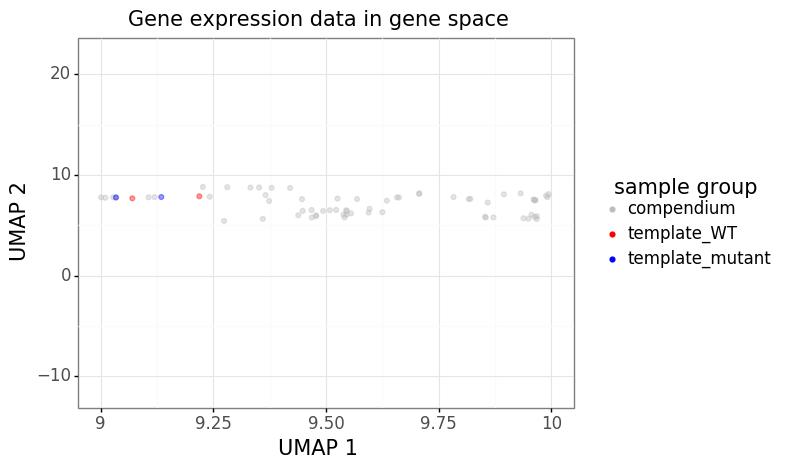

<ggplot: (8757692036073)>


In [32]:
# Plot

# Drop label column
normalized_all_data_numeric = normalized_all_data.drop(['sample group'], axis=1)

model = umap.UMAP(random_state=1).fit(normalized_all_data_numeric)

normalized_all_data_UMAPencoded = model.transform(normalized_all_data_numeric)
normalized_all_data_UMAPencoded_df = pd.DataFrame(data=normalized_all_data_UMAPencoded,
                                         index=normalized_all_data.index,
                                         columns=['1','2'])

# Add back label column
normalized_all_data_UMAPencoded_df['sample group'] = normalized_all_data['sample group']

# Plot
fig = pn.ggplot(normalized_all_data_UMAPencoded_df, pn.aes(x='1', y='2'))
fig += pn.geom_point(pn.aes(color='sample group'), alpha=0.4)
fig += pn.labs(x ='UMAP 1',
            y = 'UMAP 2',
            title = 'Gene expression data in gene space')
fig += pn.theme_bw()
fig += pn.theme(
    legend_title_align = "center",
    plot_background=pn.element_rect(fill='white'),
    legend_key=pn.element_rect(fill='white', colour='white'), 
    legend_title=pn.element_text(family='sans-serif', size=15),
    legend_text=pn.element_text(family='sans-serif', size=12),
    plot_title=pn.element_text(family='sans-serif', size=15),
    axis_text=pn.element_text(family='sans-serif', size=12),
    axis_title=pn.element_text(family='sans-serif', size=15)
    )
fig += pn.scale_color_manual(['#bdbdbd', 'red', 'blue'])
fig += pn.guides(colour=pn.guide_legend(override_aes={'alpha': 1}))

fig += pn.scales.xlim(9,10)
print(fig)

Based on a UMAP of the normalized gene expression data, it looks like there isn't a clear separation between WT and mutant samples, though there are only 2 samples per group so this type of clustering observation is limited.

**Takeaway:**

In trying to understand why there are these flat-tops to some of the volcano plots and why some volcano plots are completely flat, we found:
1. This behavior is _not_ a result of how we are plotting in python (there was some speculation about there being an issue with the numpy library used)
2. The latent space shifting we're doing seems to roughly preserve differences between groups (as seen in [this notebook](https://github.com/greenelab/simulate-expression-compendia/blob/master/Pseudo_experiments/create_heatmap.ipynb) where the structure of the samples is preserved but there is a different set of related genes that are DE. More information can be found in Figure 3D in [this paper](https://academic.oup.com/gigascience/article/9/11/giaa117/5952607)), but this signal can be muddled/noisy depending on where the experiment was shifted to (i.e. the representation that is found in that location can cause the experiment to have a more compressed difference between groups) as seen in the heatmaps. The heatmap of the two simulation experiments shows that some experiments have a more noisey distinction between groups (WT vs mutant) whereas the other simulation experiment has a more distinct difference where the within grouping is cleaner. This definitely points to the need to understand how this simulation process is working and how biology is represented in the latent space. This will definitely be a project for the future. For now we at least have an explanation for why we are observing these shapes in the volcano plots